# Are Top Universities More Attractive To Tech Startups?

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction <a name="introduction"></a>

Do we see more tech startups around the top Universities in the UK?  There is evidence that tech startups cluster togther and become incubators for innovation but does that also correlate with where certain Universities are located?

The purpose of this project is to find out if certain Universities have a higher proportion of tech startups in close proxity and the similarities between those Universities.

## Data <a name="data"></a>

To look at this problem we are going to need two data sets:
* A list of UK universities with ranking data
* A count of tech startups in close proximity to each University

For the university ranking data we will use The Times Higher Education World Rankings data

To get tech startup proximity data we will use the FourSquare API

### UK university ranking data

The data is not easy to scrape from the THE website, luckily this data has already been collected by a contributor on kaggle

The data can be found in https://www.kaggle.com/joeshamen/world-university-rankings-2020/download

Credit must be given to THE for producing this data and Joe Shamen for making it available in this form

#### Import and format the university ranking data

In [1]:
import pandas as pd
import numpy as np

In [2]:
# To get the data from kaggle you need to provide a username and password so the data has been pre-downloaded aand extracted
uni_df = pd.read_csv('Word_University_Rank_2020.csv')
uni_df.head()

,Rank_Char,Score_Rank,University,Country,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result,Overall_Ranking
0,1,1,University of Oxford,United Kingdom,"20,664",11.2,41%,46%,54%,90.5,99.6,98.4,65.5,96.4,95.4,95.40
1,2,2,California Institute of Technology,United States,"2,240",6.4,30%,34%,66%,92.1,97.2,97.9,88.0,82.5,94.5,94.50
2,3,3,University of Cambridge,United Kingdom,"18,978",10.9,37%,47%,53%,91.4,98.7,95.8,59.3,95.0,94.4,94.40
3,4,4,Stanford University,United States,"16,135",7.3,23%,43%,57%,92.8,96.4,99.9,66.2,79.5,94.3,94.30
4,5,5,Massachusetts Institute of Technology,United States,"11,247",8.6,34%,39%,61%,90.5,92.4,99.5,86.9,89.0,93.6,93.60


In [3]:
# We are only interested in the UK so filter out other countries
uni_df = uni_df[uni_df['Country']=='United Kingdom']
uni_df.head()

,Rank_Char,Score_Rank,University,Country,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result,Overall_Ranking
0,1,1,University of Oxford,United Kingdom,"20,664",11.2,41%,46%,54%,90.5,99.6,98.4,65.5,96.4,95.4,95.40
2,3,3,University of Cambridge,United Kingdom,"18,978",10.9,37%,47%,53%,91.4,98.7,95.8,59.3,95.0,94.4,94.40
9,10,10,Imperial College London,United Kingdom,"16,760",11.7,56%,38%,62%,84.5,87.6,97.0,69.9,97.1,89.8,89.80
14,15,14,UCL,United Kingdom,"32,665",10.6,52%,57%,43%,77.8,88.7,96.1,42.7,96.2,87.1,87.10
27,27,26,London School of Economics and Political Science,United Kingdom,"10,570",12.1,71%,53%,47%,69.0,83.0,92.8,35.1,93.2,81.3,81.30


In [4]:
# Drop columns we are not interested in.  Remove rank, we will use the index
uni_df.drop(columns=['Rank_Char','Score_Rank','Country','Number_students','Numb_students_per_Staff','Score_Result','Overall_Ranking'], inplace=True)
# Reset the index
uni_df.reset_index(drop=True, inplace=True)
uni_df.head()

,University,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook
0,University of Oxford,41%,46%,54%,90.5,99.6,98.4,65.5,96.4
1,University of Cambridge,37%,47%,53%,91.4,98.7,95.8,59.3,95.0
2,Imperial College London,56%,38%,62%,84.5,87.6,97.0,69.9,97.1
3,UCL,52%,57%,43%,77.8,88.7,96.1,42.7,96.2
4,London School of Economics and Political Science,71%,53%,47%,69.0,83.0,92.8,35.1,93.2


In [5]:
# Remove percentage signs and divide every number by 100 so they are equally scaled
pct_cols=['International_Students','Percentage_Female','Percentage_Male']
all_cols=uni_df.columns.tolist()[1:]
uni_df[pct_cols] = uni_df[pct_cols].replace({'\%':''}, regex=True)
uni_df[all_cols] = (uni_df[all_cols].astype('float') / 100)
uni_df.head()

,University,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook
0,University of Oxford,0.41,0.46,0.54,0.905,0.996,0.984,0.655,0.964
1,University of Cambridge,0.37,0.47,0.53,0.914,0.987,0.958,0.593,0.950
2,Imperial College London,0.56,0.38,0.62,0.845,0.876,0.970,0.699,0.971
3,UCL,0.52,0.57,0.43,0.778,0.887,0.961,0.427,0.962
4,London School of Economics and Political Science,0.71,0.53,0.47,0.690,0.830,0.928,0.351,0.932


### Tech Startup Data

For this we get a count of tech startups near each university using the FourSquare API

Before we can use the API we need to find the coordinates for each University.  For that we will use the geopy package and the Nominatim geocoder.

In [6]:
!conda install -c conda-forge geopy

Solving environment: ...working... done

# All requested packages already installed.



In [9]:
# Note that user_agent which is email is read from a config file to keep it secret
import configparser
config = configparser.ConfigParser()
config.read('config.ini')

# Get the coords for each university by name
from geopy.geocoders import Nominatim
from functools import partial
geolocator = Nominatim(user_agent=config['GEOPY']['agent'])
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
uni_df['location'] = uni_df['University'].apply(partial(geocode, country_codes='gb'))

uni_df['location']=uni_df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
uni_df['location']

0             (51.75870755, -1.2556684826092037, 0.0)
1              (52.1998523, 0.11973865741074383, 0.0)
2            (51.49887085, -0.17560795583940397, 0.0)
3            (51.52412645, -0.13293023735954784, 0.0)
4     (51.514429050000004, -0.11658840336537557, 0.0)
                           ...                       
95                      (51.5860883, -2.9906177, 0.0)
96             (53.5583158, -2.8692724627754553, 0.0)
97              (53.1857524, -2.891162674972156, 0.0)
98             (51.497788, -0.10185926156148581, 0.0)
99              (51.27918085, 1.090230903404285, 0.0)
Name: location, Length: 100, dtype: object

In [15]:
# Lets validate the data, first by finding any nulls
uni_df[uni_df['location'].isna()]

,University,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook,location
6,King�s College London,0.44,0.62,0.38,0.613,0.685,0.948,0.456,0.956,None
29,Queen�s University Belfast,0.36,0.55,0.45,0.312,0.355,0.837,0.387,0.964,None
32,"St George�s, University of London",0.21,0.62,0.38,0.240,0.220,0.982,0.369,0.796,None
37,"Royal Holloway, University of London",0.36,0.59,0.41,0.306,0.302,0.734,0.371,0.928,None
42,"Birkbeck, University of London",0.38,0.54,0.46,0.276,0.315,0.628,0.345,0.874,None
44,"Goldsmiths, University of London",0.35,0.66,0.34,0.338,0.286,0.604,0.351,0.794,None
61,University of the West of Scotland,0.21,0.59,0.41,0.139,0.139,0.768,0.350,0.746,None
68,University of Huddersfield,0.24,0.55,0.45,0.228,0.200,0.448,0.366,0.720,None


In [22]:
# For the nulls we will manually add the coordinates
uni_df.at[6, 'location']=(51.512100,-0.117330,0.0)
uni_df.at[29, 'location'] = (54.585499,-5.936220,0.0)
uni_df.at[32, 'location'] = (51.427799,-0.175770,0.0)
uni_df.at[37, 'location'] = (51.425680,-0.564470,0.0)
uni_df.at[42, 'location'] = (51.520329,-0.129040,0.0)
uni_df.at[44, 'location'] = (51.474144,-0.035401,0.0)
uni_df.at[61, 'location'] = (55.778264,-4.104054,0.0)
uni_df.at[68, 'location'] = (53.643678,-1.778726,0.0)
uni_df[uni_df['location'].isna()]

,University,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook,location


In [39]:
uni_df

,University,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook,location
0,University of Oxford,0.41,0.46,0.54,0.905,0.996,0.984,0.655,0.964,"(51.75870755, -1.2556684826092037, 0.0)"
1,University of Cambridge,0.37,0.47,0.53,0.914,0.987,0.958,0.593,0.950,"(52.1998523, 0.11973865741074383, 0.0)"
2,Imperial College London,0.56,0.38,0.62,0.845,0.876,0.970,0.699,0.971,"(51.49887085, -0.17560795583940397, 0.0)"
3,UCL,0.52,0.57,0.43,0.778,0.887,0.961,0.427,0.962,"(51.52412645, -0.13293023735954784, 0.0)"
4,London School of Economics and Political Science,0.71,0.53,0.47,0.690,0.830,0.928,0.351,0.932,"(51.514429050000004, -0.11658840336537557, 0.0)"
...,...,...,...,...,...,...,...,...,...,...
95,University of South Wales,0.19,0.53,0.47,0.162,0.092,0.279,0.349,0.640,"(51.5860883, -2.9906177, 0.0)"
96,Edge Hill University,0.05,0.68,0.32,0.148,0.102,0.331,0.344,0.424,"(53.5583158, -2.8692724627754553, 0.0)"
97,University of Chester,0.11,0.67,0.33,0.158,0.127,0.248,0.348,0.466,"(53.1857524, -2.891162674972156, 0.0)"
98,London South Bank University,0.33,0.56,0.44,0.154,0.104,0.181,0.348,0.753,"(51.497788, -0.10185926156148581, 0.0)"


In [42]:
# Create a map
!conda install -c conda-forge folium=0.5.0 --yes
import folium

# Create a map centered on the middle of England (Birmingham)
map_uk = folium.Map(location=[52.4862, -1.8904], zoom_start=6)

# Add markers to map
for lat, lng, uni in zip(uni_df['location'].str[0], uni_df['location'].str[1], uni_df['University']):
    label = '{}'.format(uni)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_uk)
    
map_uk

Solving environment: ...working... done

# All requested packages already installed.



In [43]:
# Data looks ok so lets save it for future use
uni_df.to_csv('uni_df.csv')

In [79]:
# For each university lets get the count of nearby tech startups
import requests
from pandas import json_normalize

CLIENT_ID=config['FOURSQUARE']['CLIENT_ID']
CLIENT_SECRET=config['FOURSQUARE']['CLIENT_SECRET']
VERSION=config['FOURSQUARE']['VERSION']
categoryId='4bf58dd8d48988d125941735'
radius = 1000
limit=50

In [84]:
def getTechStartupCount(unis,lats,lons):
    tech_cnt_list=[]
    for uni, lat, lon in zip(unis, lats, lons):
        print(uni)
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, lat, lon, VERSION, categoryId, radius, limit)
        results = requests.get(url).json()['response']['venues']
        tech_df = json_normalize(results)
        if not tech_df.empty:
            tech_cnt_list.append((uni, tech_df['name'].count()))
        else:
            tech_cnt_list.append((uni, 0))
    return tech_cnt_list

In [85]:
tech_list=getTechStartupCount(unis=uni_df['University'], lats=uni_df['location'].str[0], lons=uni_df['location'].str[1])
tech_list

University of Oxford
University of Cambridge
Imperial College London
UCL
London School of Economics and Political Science
University of Edinburgh
King�s College London
University of Manchester
University of Warwick
University of Bristol
University of Glasgow
Queen Mary University of London
University of Birmingham
University of Sheffield
University of Southampton
University of York
Durham University
Lancaster University
University of Exeter
University of Sussex
University of Nottingham
University of Leeds
University of Liverpool
University of Leicester
University of Aberdeen
University of East Anglia
Cardiff University
University of St Andrews
Newcastle University
Queen�s University Belfast
University of Reading
University of Dundee
St George�s, University of London
University of Surrey
Swansea University
University of Essex
University of Bath
Royal Holloway, University of London
Brighton and Sussex Medical School
Heriot-Watt University
Anglia Ruskin University
University of Stirling
B

[('University of Oxford', 6),
 ('University of Cambridge', 17),
 ('Imperial College London', 15),
 ('UCL', 47),
 ('London School of Economics and Political Science', 45),
 ('University of Edinburgh', 30),
 ('King�s College London', 44),
 ('University of Manchester', 39),
 ('University of Warwick', 4),
 ('University of Bristol', 30),
 ('University of Glasgow', 11),
 ('Queen Mary University of London', 11),
 ('University of Birmingham', 0),
 ('University of Sheffield', 4),
 ('University of Southampton', 1),
 ('University of York', 2),
 ('Durham University', 0),
 ('Lancaster University', 1),
 ('University of Exeter', 3),
 ('University of Sussex', 2),
 ('University of Nottingham', 2),
 ('University of Leeds', 3),
 ('University of Liverpool', 4),
 ('University of Leicester', 10),
 ('University of Aberdeen', 1),
 ('University of East Anglia', 1),
 ('Cardiff University', 13),
 ('University of St Andrews', 1),
 ('Newcastle University', 25),
 ('Queen�s University Belfast', 17),
 ('University of

In [87]:
# Create a new dataframe and save as a csv
tech_df = pd.DataFrame(tech_list, columns =['University', 'Tech_Cnt'])
tech_df.to_csv('tech_df.csv')

## Methodology <a name="methodology"></a>

The data will be analysed from two perspectives.  __One__ is by looking at the correlation between the number of tech startups and attributes of each University.  For this we will look for linear relationships between the values and their significance through statistical measures such as pearsons correlation coefficient.  __Secondly__ the Univerities will clustered using kmeans clustering and then we will look if there is a relationship there.

## Analysis <a name="analysis"></a>

### First lets reload our data 

In [1]:
import pandas as pd
import numpy as np

uni_df = pd.read_csv('uni_df.csv')
tech_df = pd.read_csv('tech_df.csv')

# Get rid of the index columns
uni_df.drop(uni_df.columns[0], axis=1, inplace=True)
tech_df.drop(tech_df.columns[0], axis=1, inplace=True)

print(uni_df.head())
print(tech_df.head())

                                         University  International_Students  \
0                              University of Oxford                    0.41   
1                           University of Cambridge                    0.37   
2                           Imperial College London                    0.56   
3                                               UCL                    0.52   
4  London School of Economics and Political Science                    0.71   

   Percentage_Female  Percentage_Male  Teaching  Research  Citations  \
0               0.46             0.54     0.905     0.996      0.984   
1               0.47             0.53     0.914     0.987      0.958   
2               0.38             0.62     0.845     0.876      0.970   
3               0.57             0.43     0.778     0.887      0.961   
4               0.53             0.47     0.690     0.830      0.928   

   Industry_Income  International_Outlook  \
0            0.655                  0.964   
1 

### Build a column from index as Ranking

In [2]:
uni_df = uni_df.rename_axis('ranking').reset_index()
# Make the ranking start from 1
uni_df['ranking'] = (uni_df['ranking'].astype('int') +1)
uni_df.head()

,ranking,University,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook,location
0,1,University of Oxford,0.41,0.46,0.54,0.905,0.996,0.984,0.655,0.964,"(51.75870755, -1.2556684826092037, 0.0)"
1,2,University of Cambridge,0.37,0.47,0.53,0.914,0.987,0.958,0.593,0.950,"(52.1998523, 0.11973865741074383, 0.0)"
2,3,Imperial College London,0.56,0.38,0.62,0.845,0.876,0.970,0.699,0.971,"(51.49887085, -0.17560795583940397, 0.0)"
3,4,UCL,0.52,0.57,0.43,0.778,0.887,0.961,0.427,0.962,"(51.52412645, -0.13293023735954784, 0.0)"
4,5,London School of Economics and Political Science,0.71,0.53,0.47,0.690,0.830,0.928,0.351,0.932,"(51.514429050000004, -0.11658840336537557, 0.0)"


### Setup visualisation

In [3]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

# import seaborn for graphing
!conda install -c anaconda seaborn --yes
import seaborn as sns

Solving environment: ...working... done

# All requested packages already installed.



### Merge the Datasets

In [4]:
df_merged = uni_df.merge(tech_df, left_on='University', right_on='University')
df_merged.head()

,ranking,University,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook,location,Tech_Cnt
0,1,University of Oxford,0.41,0.46,0.54,0.905,0.996,0.984,0.655,0.964,"(51.75870755, -1.2556684826092037, 0.0)",6
1,2,University of Cambridge,0.37,0.47,0.53,0.914,0.987,0.958,0.593,0.950,"(52.1998523, 0.11973865741074383, 0.0)",17
2,3,Imperial College London,0.56,0.38,0.62,0.845,0.876,0.970,0.699,0.971,"(51.49887085, -0.17560795583940397, 0.0)",15
3,4,UCL,0.52,0.57,0.43,0.778,0.887,0.961,0.427,0.962,"(51.52412645, -0.13293023735954784, 0.0)",47
4,5,London School of Economics and Political Science,0.71,0.53,0.47,0.690,0.830,0.928,0.351,0.932,"(51.514429050000004, -0.11658840336537557, 0.0)",45


### Lets see if there is any relationship between Ranking and Tech Startup Count

Text(0.5, 1.0, 'Relationship between Tech Startup Count and University Ranking')

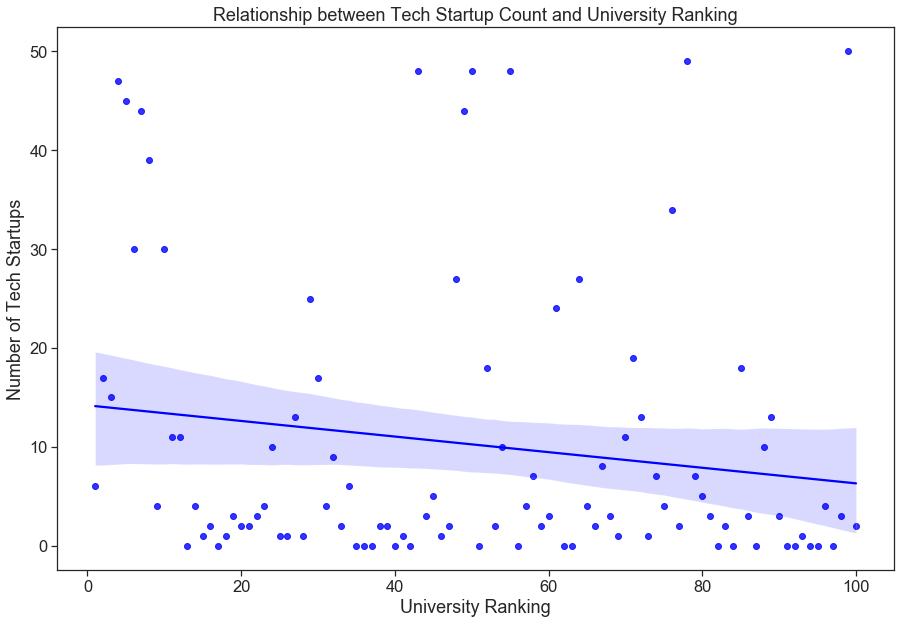

In [5]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)
sns.set_style('ticks')

ax = sns.regplot(x='ranking', y='Tech_Cnt', data=df_merged, color='blue')
ax.set(xlabel='University Ranking', ylabel='Number of Tech Startups')
ax.set_title('Relationship between Tech Startup Count and University Ranking')

Doesn't appear to be a relationship here

Lets find out what pearson tells us

In [6]:
from scipy.stats import pearsonr 

corr, pval = pearsonr(df_merged['ranking'], df_merged['Tech_Cnt'])
print(f'Correlation:: {corr}, Significance:: {pval}')

Correlation:: -0.15989384537789045, Significance:: 0.11204284425635871


This tells us the relationship is quite random. the correlation is not statistically significant

### Lets see if there is any relationship between Male Representation and Tech Startup Count

Is there gender bias?

Text(0.5, 1.0, 'Relationship between Tech Startup Count and University Male Representation')

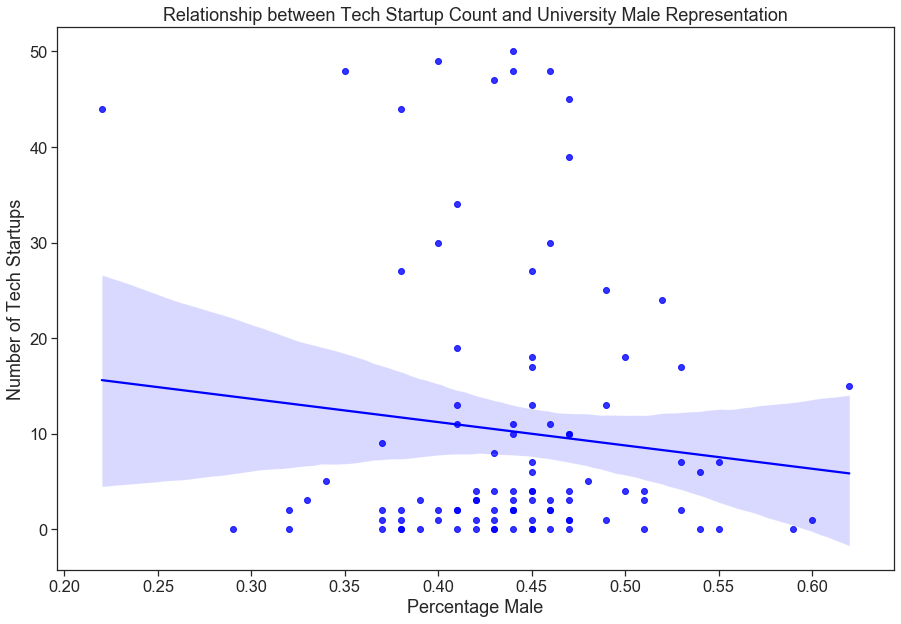

In [7]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)
sns.set_style('ticks')

ax = sns.regplot(x='Percentage_Male', y='Tech_Cnt', data=df_merged, color='blue')
ax.set(xlabel='Percentage Male', ylabel='Number of Tech Startups')
ax.set_title('Relationship between Tech Startup Count and University Male Representation')

Doesn't appear to be a relationship here

Lets find out what pearson tells us

In [8]:
from scipy.stats import pearsonr 

corr, pval = pearsonr(df_merged['Percentage_Male'], df_merged['Tech_Cnt'])
print(f'Correlation:: {corr}, Significance:: {pval}')

Correlation:: -0.10689824071206178, Significance:: 0.2897913801355428


This tells us the relationship is quite random. the correlation is not statistically significant

### Check multiple variables

Instead of going through each variable in turn lets graph the variables simultaneously so we can spot any relationships

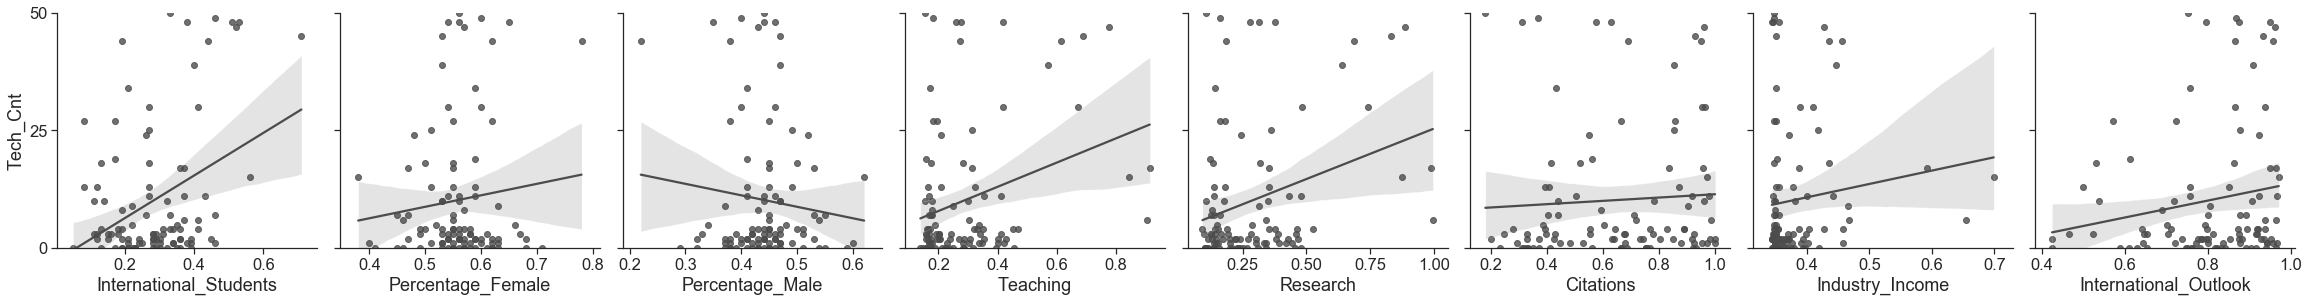

In [9]:
x_vars=df_merged.columns.tolist()[2:10]
g = sns.PairGrid(df_merged, y_vars=['Tech_Cnt'], x_vars=x_vars, height=4)
g.map(sns.regplot, color=".3")
g.set(ylim=(0, 50), yticks=[0, 25, 50]);

Looking at the graphs the strongest corelations appear to be:
* Ratio of International Students
* Teaching Score
* Research Score
* International Outlook Score

Lets run these through pearson to see if these are statistically significant

In [10]:
x_list = ['International_Students', 'Teaching', 'Research', 'International_Outlook']

for x in x_list:
    corr, pval = pearsonr(df_merged[x], df_merged['Tech_Cnt'])
    print(f'Variable:: {x}, Correlation:: {corr}, Significance:: {pval}')

Variable:: International_Students, Correlation:: 0.3725851074495698, Significance:: 0.00013485931494028897
Variable:: Teaching, Correlation:: 0.29666362220215314, Significance:: 0.00272546569137422
Variable:: Research, Correlation:: 0.2987968924629771, Significance:: 0.002530209708622019
Variable:: International_Outlook, Correlation:: 0.16969820209989445, Significance:: 0.09142801878333925


All of the correlations are quite weak.  P values under 0.05 indicates statistical significance so all have significance except International Outlook.

### Cluster Universities And Analyse

Lets cluster the universities based on there attributes and lets see if particular clusters have a higher number of tech startups

We are going to use kmeans as our cluustering algorithm.  We will start with a k of 4 and then go from there.

#### Create our clusters

In [11]:
# First thing lets create a new df with columns we want to use in the clustering algorithm
df_cluster = df_merged.drop(columns=['ranking','University','location','Tech_Cnt'])
df_cluster

,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook
0,0.41,0.46,0.54,0.905,0.996,0.984,0.655,0.964
1,0.37,0.47,0.53,0.914,0.987,0.958,0.593,0.950
2,0.56,0.38,0.62,0.845,0.876,0.970,0.699,0.971
3,0.52,0.57,0.43,0.778,0.887,0.961,0.427,0.962
4,0.71,0.53,0.47,0.690,0.830,0.928,0.351,0.932
...,...,...,...,...,...,...,...,...
95,0.19,0.53,0.47,0.162,0.092,0.279,0.349,0.640
96,0.05,0.68,0.32,0.148,0.102,0.331,0.344,0.424
97,0.11,0.67,0.33,0.158,0.127,0.248,0.348,0.466
98,0.33,0.56,0.44,0.154,0.104,0.181,0.348,0.753


In [12]:
from sklearn.cluster import KMeans

# Create our clusters
k = 4

# Fit the data and get our clusters
kmeans = KMeans(n_clusters=k, random_state=0).fit(df_cluster)

# Look at the generated labels
kmeans.labels_[0:20] 

array([3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
# Let now add cluster labels to the original data so we can see the full context
df_merged_with_cluster = df_merged.copy()

df_merged_with_cluster.insert(0, 'cluster', kmeans.labels_)

df_merged_with_cluster

,cluster,ranking,University,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook,location,Tech_Cnt
0,3,1,University of Oxford,0.41,0.46,0.54,0.905,0.996,0.984,0.655,0.964,"(51.75870755, -1.2556684826092037, 0.0)",6
1,3,2,University of Cambridge,0.37,0.47,0.53,0.914,0.987,0.958,0.593,0.950,"(52.1998523, 0.11973865741074383, 0.0)",17
2,3,3,Imperial College London,0.56,0.38,0.62,0.845,0.876,0.970,0.699,0.971,"(51.49887085, -0.17560795583940397, 0.0)",15
3,3,4,UCL,0.52,0.57,0.43,0.778,0.887,0.961,0.427,0.962,"(51.52412645, -0.13293023735954784, 0.0)",47
4,3,5,London School of Economics and Political Science,0.71,0.53,0.47,0.690,0.830,0.928,0.351,0.932,"(51.514429050000004, -0.11658840336537557, 0.0)",45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,96,University of South Wales,0.19,0.53,0.47,0.162,0.092,0.279,0.349,0.640,"(51.5860883, -2.9906177, 0.0)",4
96,2,97,Edge Hill University,0.05,0.68,0.32,0.148,0.102,0.331,0.344,0.424,"(53.5583158, -2.8692724627754553, 0.0)",0
97,2,98,University of Chester,0.11,0.67,0.33,0.158,0.127,0.248,0.348,0.466,"(53.1857524, -2.891162674972156, 0.0)",3
98,2,99,London South Bank University,0.33,0.56,0.44,0.154,0.104,0.181,0.348,0.753,"(51.497788, -0.10185926156148581, 0.0)",50


#### What are the counts in each cluster?

In [14]:
df_count = df_merged_with_cluster[['cluster','ranking']].groupby(['cluster']).count().reset_index()
df_count.columns = ['cluster','count']
df_count

,cluster,count
0,0,25
1,1,33
2,2,34
3,3,8


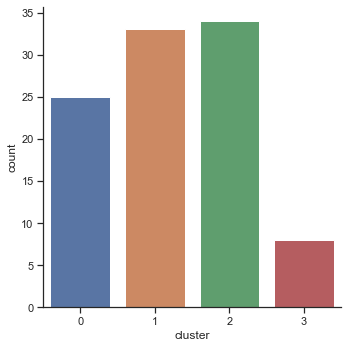

In [15]:
sns.set(style='ticks')
g = sns.catplot(x='cluster', y='count', kind='bar', data=df_count)

#### Optimise k

Lets use the silhouette score to find how similar points are and then from that work out the optimal value for k

A large silhouette score is what we are looking for

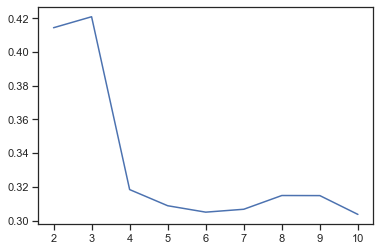

In [16]:
from sklearn.metrics import silhouette_score

sil_score = []
k_list=[]
kmax = 10

# We start with k = 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(df_cluster)
    labels = kmeans.labels_
    sil_score.append(silhouette_score(df_cluster, labels, metric = 'euclidean'))
    k_list.append(k)
    
# Lets plot k against the silhouette score
ax = sns.lineplot(x=k_list, y=sil_score)

From this we can see that the best value of k is 3

#### Run k means for optimal

In [17]:
# Create our clusters
k = 3

# Fit the data and get our clusters
kmeans = KMeans(n_clusters=k, random_state=0).fit(df_cluster)

# Look at the generated labels
kmeans.labels_[0:20]

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
# Let now add cluster labels to the original data so we can see the full context
df_merged_with_cluster = df_merged.copy()

df_merged_with_cluster.insert(0, 'cluster', kmeans.labels_)

df_merged_with_cluster

,cluster,ranking,University,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook,location,Tech_Cnt
0,2,1,University of Oxford,0.41,0.46,0.54,0.905,0.996,0.984,0.655,0.964,"(51.75870755, -1.2556684826092037, 0.0)",6
1,2,2,University of Cambridge,0.37,0.47,0.53,0.914,0.987,0.958,0.593,0.950,"(52.1998523, 0.11973865741074383, 0.0)",17
2,2,3,Imperial College London,0.56,0.38,0.62,0.845,0.876,0.970,0.699,0.971,"(51.49887085, -0.17560795583940397, 0.0)",15
3,2,4,UCL,0.52,0.57,0.43,0.778,0.887,0.961,0.427,0.962,"(51.52412645, -0.13293023735954784, 0.0)",47
4,2,5,London School of Economics and Political Science,0.71,0.53,0.47,0.690,0.830,0.928,0.351,0.932,"(51.514429050000004, -0.11658840336537557, 0.0)",45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,96,University of South Wales,0.19,0.53,0.47,0.162,0.092,0.279,0.349,0.640,"(51.5860883, -2.9906177, 0.0)",4
96,0,97,Edge Hill University,0.05,0.68,0.32,0.148,0.102,0.331,0.344,0.424,"(53.5583158, -2.8692724627754553, 0.0)",0
97,0,98,University of Chester,0.11,0.67,0.33,0.158,0.127,0.248,0.348,0.466,"(53.1857524, -2.891162674972156, 0.0)",3
98,0,99,London South Bank University,0.33,0.56,0.44,0.154,0.104,0.181,0.348,0.753,"(51.497788, -0.10185926156148581, 0.0)",50


In [22]:
df_count = df_merged_with_cluster[['cluster','ranking']].groupby(['cluster']).count().reset_index()
df_count.columns = ['cluster','count']
df_count

,cluster,count
0,0,42
1,1,50
2,2,8


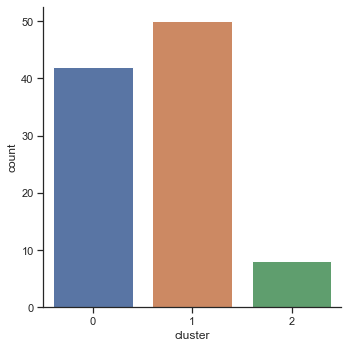

In [23]:
sns.set(style='ticks')
g = sns.catplot(x='cluster', y='count', kind='bar', data=df_count)

Lets visualise the clusters

As we are using multiple variables we need reduce the dimensions by using a method like Principal Component Analysis (PCA)

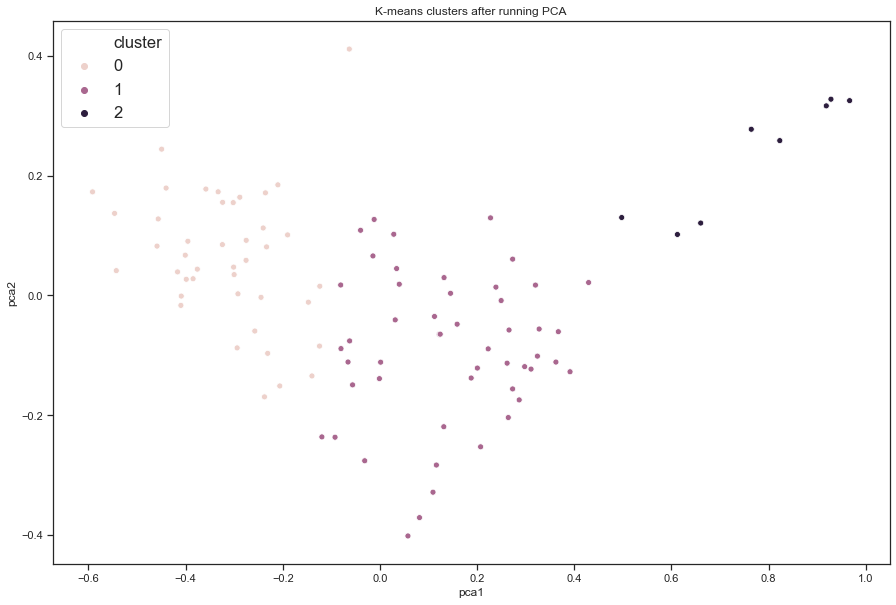

In [24]:
# Run PCA analysis
from sklearn.decomposition import PCA

df_pca = PCA(n_components=2).fit_transform(df_cluster)
df_pca = pd.DataFrame(df_pca, columns=['pca1', 'pca2'])

plt.figure(figsize=(15, 10))
plt.title('K-means clusters after running PCA')
sns.set(font_scale=1.5)
sns.set_style('ticks')
sns.scatterplot(x='pca1', y='pca2', hue=df_merged_with_cluster['cluster'], data=df_pca)

The clusters can be eaily identified.  We can see that cluster 2 which is the high ranking Universities has mini clusters effectively and cluster 0 has a outlier which is far from all the clusters.

Our original analysis has shown that this k for kmeans produces the best similarity

#### Attributes of each cluster

Lets run some simple statistics across the clusters so we can compare them

In [34]:
ignore_cols = ['cluster','University','location']
for col in df_merged_with_cluster.columns.tolist():
    if col not in ignore_cols:
        print(col)
        print(df_merged_with_cluster.groupby(['cluster'])[col].agg(['min','max','mean']))

ranking
         min  max       mean
cluster                     
0         55  100  79.238095
1          9   62  33.720000
2          1    8   4.500000
International_Students
          min   max      mean
cluster                      
0        0.05  0.53  0.222619
1        0.14  0.51  0.305400
2        0.37  0.71  0.477500
Percentage_Female
          min   max      mean
cluster                      
0        0.47  0.71  0.577857
1        0.40  0.78  0.549000
2        0.38  0.62  0.520000
Percentage_Male
          min   max      mean
cluster                      
0        0.29  0.53  0.422143
1        0.22  0.60  0.451000
2        0.38  0.62  0.480000
Teaching
           min    max      mean
cluster                        
0        0.148  0.419  0.188119
1        0.139  0.469  0.303640
2        0.569  0.914  0.748375
Research
           min    max      mean
cluster                        
0        0.092  0.377  0.150381
1        0.139  0.527  0.323820
2        0.638  0.996  0.830000
Ci

We can see that on average the Universities in cluster 2 have more tech startups near them.  These are also the same Universities that have higher values for the features that we saw earlier which had a weak correlation to tech startup count.

## Results and Discussion <a name="results"></a>

The analysis has shown that there is some correlation between clusters of Universities and the number of tech startups.

What we found was that individual features did not have a strong correlation but a combination did seem to have an effect.  The top Univerities clustered together, as an average had a higher tech startup count and interestingly at an average they had higher values for:
* Ratio of International Students
* Teaching Score
* Research Score

During the analysis we found that these features individually had a weak correlation to the number of tech startups but the correlation was statistically significant.

While there does appear to be a correlation we cannot be sure it is causation.  Other areas to look at is location, from the data we could see that the tech startup count was higher around particular cities so this is an area for more investigation.

## Conclusion <a name="conclusion"></a>

The purpose of this report is to help understand the relationship between Universities and tech startups.  We have found a correlation with the top Universities but there are data points such as location that should be investigated further.

Hopefully this will be helpful for tech startups trying to find the best location to start their business.